***

<center>
 
### ANLY 590 | Homework 2
### Kendra Gedney | kg729@georgetown.edu 

<center>

In [11]:
# set working directory
import os
path = '/Users/kgedney/Documents/georgetown/anly590/anly590-homework'
os.chdir(path)

In [12]:
# prep
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

### Problem 1: Autoencoder

_For this problem, I used the same network as in the blo

A convolutional autoencoder is a particular flavor of autoencoder where we use convolutional layers instead of dense layers. We have previously applied autoencoders to images using only Dense layers and the result worked fairly well. However, the local spatial correlations of images imply that we should be able to do better using convolutional layers instead of Dense layers.   
   
Build and fit a convolutional autoencoder for the Fashion MNIST dataset. The components of this network will be many of the same pieces we’ve used with convolutional classification networks: Conv2D, MaxPooling, and so on. The encoder part of the network should run the input image through a few convolutional layers of your choice. The decoder part of the network will utilize UpSampling2D to get the representation back to the original image size.   

An example to guide your thinking can be found toward the bottom of this post https://blog.keras.io/building-autoencoders-in-keras.html.
   
After training your network, visualize some examples of input images and their decoded reconstruction.


In [13]:
# prep
from keras.utils import np_utils

from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D, UpSampling2D

In [27]:
# load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [28]:
# check shapes
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [29]:
# normalize grayscale
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.

# reshape images
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test  = x_test.reshape(x_test.shape[0], 28, 28, 1)
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test  = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [30]:
# 10 classes of clothing types - make categorical
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [7]:
# copy network from blog post
input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [9]:
# train network
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 50s 831us/step - loss: 0.3596 - val_loss: 0.3420
Epoch 2/5
60000/60000 [==============================] - 54s 900us/step - loss: 0.3273 - val_loss: 0.3249
Epoch 3/5
60000/60000 [==============================] - 56s 933us/step - loss: 0.3166 - val_loss: 0.3148
Epoch 4/5
60000/60000 [==============================] - 58s 965us/step - loss: 0.3105 - val_loss: 0.3109
Epoch 5/5
60000/60000 [==============================] - 57s 949us/step - loss: 0.3069 - val_loss: 0.3072


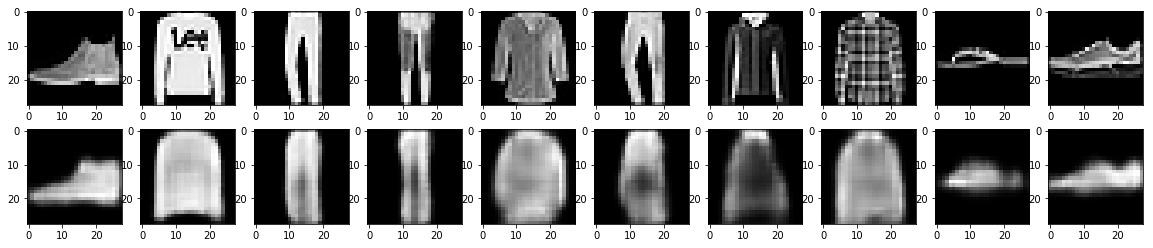

In [16]:
# visualize images before and after decoding
plt.figure(figsize=(20, 4))

n=10
for k in range(n):
    ax = plt.subplot(2, n, k+1)
    plt.imshow(x_test[k:k+1,:].reshape((28,28)), "gray")
    ax = plt.subplot(2, n, k+1 + n)
    reconstruction = autoencoder.predict(x_test[k:k+1,:])
    reconstruction.resize((28,28))
    plt.imshow(reconstruction, "gray")

### Problem 2: Image Classification

#### 2.1: Deep CNN
Build a deep CNN to classify the images. Provide a brief description of the architectural choices you’ve made: kernel sizes, strides, padding, network depth. Train your network end-to-end. Report on your model’s performance on training set and test set.


- first used the LeNet architecture -> 86% test accuracy
- did a more simple model, but with less dropout, and larger denser layer at the end -> 
- found that adam optimizer resulted in some modest accuracy gains


In [ ]:
# use same dataset as before so inputs are the same


In [17]:
# start with a LeNet arichtecture
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid', input_shape=(28,28,1)))

model.add(Flatten())
model.add(Dense(84))
model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [18]:
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [20]:
model.fit(x_train, y_train, epochs=4, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 26s 439us/step - loss: 0.5467 - acc: 0.7956 - val_loss: 0.4759 - val_acc: 0.8236
Epoch 2/4
60000/60000 [==============================] - 24s 399us/step - loss: 0.4816 - acc: 0.8230 - val_loss: 0.4469 - val_acc: 0.8324
Epoch 3/4
60000/60000 [==============================] - 24s 402us/step - loss: 0.4417 - acc: 0.8377 - val_loss: 0.3864 - val_acc: 0.8624
Epoch 4/4
60000/60000 [==============================] - 25s 413us/step - loss: 0.4136 - acc: 0.8494 - val_loss: 0.3752 - val_acc: 0.8618


In [21]:
# 86% test accuracy
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 102us/step


[0.37518016321659087, 0.8618]

In [ ]:
### Model 2

In [23]:
# more simple 
model2 = Sequential()

model2.add(Conv2D(filters = 32, kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid', input_shape=(28,28,1)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Dense(10, activation='softmax'))

In [25]:
model2.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model2.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 24s 397us/step - loss: 0.4580 - acc: 0.8390 - val_loss: 0.3707 - val_acc: 0.8693
Epoch 2/8
60000/60000 [==============================] - 26s 435us/step - loss: 0.3313 - acc: 0.8839 - val_loss: 0.3389 - val_acc: 0.8808
Epoch 3/8
60000/60000 [==============================] - 27s 447us/step - loss: 0.3012 - acc: 0.8943 - val_loss: 0.3120 - val_acc: 0.8886
Epoch 4/8
60000/60000 [==============================] - 27s 447us/step - loss: 0.2832 - acc: 0.8998 - val_loss: 0.2992 - val_acc: 0.8954
Epoch 5/8
60000/60000 [==============================] - 25s 418us/step - loss: 0.2707 - acc: 0.9041 - val_loss: 0.2873 - val_acc: 0.8969
Epoch 6/8
60000/60000 [==============================] - 26s 430us/step - loss: 0.2595 - acc: 0.9092 - val_loss: 0.2865 - val_acc: 0.8994
Epoch 7/8
60000/60000 [==============================] - 26s 432us/step - loss: 0.2525 - acc: 0.9108 - val_loss: 0.2771 - 

In [27]:
# model2 has 89.89% accuracy
model2.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 101us/step


[0.28056134787797926, 0.8989]

In [39]:
# test model3 -> padding='same' but the images dont seem to go right to edge anyways.. 
model3 = Sequential()

model3.add(Conv2D(filters = 32, kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='same', input_shape=(28,28,1)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(128))
model3.add(Dense(10, activation='softmax'))

In [40]:
model3.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
model3.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 28s 460us/step - loss: 0.4489 - acc: 0.8430 - val_loss: 0.3578 - val_acc: 0.8690
Epoch 2/8
60000/60000 [==============================] - 29s 491us/step - loss: 0.3254 - acc: 0.8850 - val_loss: 0.3194 - val_acc: 0.8863
Epoch 3/8
60000/60000 [==============================] - 29s 478us/step - loss: 0.2947 - acc: 0.8965 - val_loss: 0.3078 - val_acc: 0.8912
Epoch 4/8
60000/60000 [==============================] - 29s 483us/step - loss: 0.2765 - acc: 0.9017 - val_loss: 0.3067 - val_acc: 0.8896
Epoch 5/8
60000/60000 [==============================] - 30s 499us/step - loss: 0.2648 - acc: 0.9060 - val_loss: 0.2981 - val_acc: 0.8924
Epoch 6/8
60000/60000 [==============================] - 29s 478us/step - loss: 0.2532 - acc: 0.9090 - val_loss: 0.2873 - val_acc: 0.8948
Epoch 7/8
60000/60000 [==============================] - 30s 500us/step - loss: 0.2471 - acc: 0.9134 - val_loss: 0.2874 - 

In [44]:
model3.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 111us/step


[0.27598051676750185, 0.9032]

In [55]:
# test model4 -> padding='valid' but change the kernel size
model4 = Sequential()

model4.add(Conv2D(filters = 32, kernel_size=(5,5), 
                 activation='relu', strides=(1, 1), 
                 padding='same', input_shape=(28,28,1)))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.2))
model4.add(Flatten())
model4.add(Dense(128))
model4.add(Dense(10, activation='softmax'))

In [50]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
model4.fit(x_train, y_train, epochs=6, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 30s 504us/step - loss: 0.3911 - acc: 0.8610 - val_loss: 0.3355 - val_acc: 0.8821
Epoch 2/6
60000/60000 [==============================] - 32s 541us/step - loss: 0.2939 - acc: 0.8936 - val_loss: 0.3154 - val_acc: 0.8900
Epoch 3/6
60000/60000 [==============================] - 36s 605us/step - loss: 0.2651 - acc: 0.9039 - val_loss: 0.3252 - val_acc: 0.8857
Epoch 4/6
60000/60000 [==============================] - 32s 535us/step - loss: 0.2448 - acc: 0.9107 - val_loss: 0.2898 - val_acc: 0.8968
Epoch 5/6
60000/60000 [==============================] - 35s 586us/step - loss: 0.2335 - acc: 0.9143 - val_loss: 0.2836 - val_acc: 0.9000
Epoch 6/6
60000/60000 [==============================] - 32s 534us/step - loss: 0.2234 - acc: 0.9173 - val_loss: 0.2795 - val_acc: 0.9052


In [48]:
# adadelta
model4.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 164us/step


[0.27819047354459764, 0.9003]

In [52]:
# adam
model4.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 149us/step


[0.27947091865539553, 0.9052]

In [56]:
# sgd - worse!
model4.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 28s 470us/step - loss: 0.6633 - acc: 0.7664 - val_loss: 0.5071 - val_acc: 0.8199
Epoch 2/6
60000/60000 [==============================] - 30s 503us/step - loss: 0.4569 - acc: 0.8384 - val_loss: 0.4428 - val_acc: 0.8407
Epoch 3/6
60000/60000 [==============================] - 31s 518us/step - loss: 0.4080 - acc: 0.8576 - val_loss: 0.4061 - val_acc: 0.8555
Epoch 4/6
60000/60000 [==============================] - 32s 535us/step - loss: 0.3798 - acc: 0.8667 - val_loss: 0.3888 - val_acc: 0.8607
Epoch 5/6
60000/60000 [==============================] - 30s 497us/step - loss: 0.3588 - acc: 0.8744 - val_loss: 0.3633 - val_acc: 0.8716
Epoch 6/6
60000/60000 [==============================] - 34s 559us/step - loss: 0.3427 - acc: 0.8797 - val_loss: 0.3426 - val_acc: 0.8807


#### 2.2:  Transfer Learning
Repeat the same task, but this time utilize a pre-trained network for the majority of your model. You should only train the final Dense layer, all other weights should be fixed. You can use whichever pre-trained backbone you like (ResNet, VGG, etc). Report on your model’s performance on training set and test set.

In [ ]:
# ref: https://medium.com/@sidereal/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5

In [31]:
# resize images
import cv2
x_train_big = np.asarray([cv2.resize(x, (48,48)) for x in x_train])
x_test_big  = np.asarray([cv2.resize(x, (48,48)) for x in x_test])
# plt.imshow(x_train_big[9], 'gray')

In [32]:
# reshape 
x_train_big = x_train_big.reshape(x_train_big.shape[0], 48, 48,1)
x_test_big  = x_test_big.reshape(x_test_big.shape[0], 48, 48, 1)

# make gray images into rgb images
x_train_big = x_train_big.repeat(3, axis=-1)
x_test_big  = x_test_big.repeat(3, axis=-1)

In [33]:
# prep VGG backbone
from keras.applications import VGG16
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(48,48,3))

In [34]:
# define model
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [35]:
# freeze weights so that we only train the final layers
conv_base.trainable = False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


In [36]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["acc"])

In [37]:
model.fit(x_train_big, 
          y_train,
          epochs=5, 
          validation_data=(x_test_big, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
35296/60000 [================>.............] - ETA: 6:56 - loss: 0.5276 - acc: 0.8115

KeyboardInterrupt: 

### Problem 3: Text Classification

While images contain local spatial correlations and structure, many other datasets contain temporal correlations. Examples include time series and discrete se- quences such as text. In this problem, we will tackle the task of text classification in the context of cybersecurity.

**Background:**   
When malware infects a host computer, it often needs to reach out to an outside server for further instructions or to download additional payloads. This outside server is called a Command-and-Control server (C2). The malware needs to send a specific communication to the C2 server, thus the C2 server needs to have a registered IP address or associated web domain so that it can be reached. Therefore, being able to identify web domains that are likely related to malware C2 can be a valuable cyber defense.

**Dataset:**    

Fortunately, security researchers have already identified and logged a large number of malicious URLs. Additionally, we can catalog common ”be- nign” URLs just from typical web behavior (these would include things like facebook.com and amazon.com). Hence, we have a labeled dataset for text classification which can be downloaded here:
-  https://s3.amazonaws.com/anly-590/url-classification/benign-urls.txt
- https://s3.amazonaws.com/anly-590/url-classification/malicious-urls.txt

#### 3.1: RNN
Build and train a Recurrent Neural Network to solve this text classification task. You can use any type of RNN you wish (SimpleRNN, GRU, LSTM).

#### 3.2: CNN
Build and train a 1D CNN for this text classification task. You might gain some insight and inspiration from these text classification approaches:
-  http://www.aclweb.org/anthology/D14-1181 
-  https://arxiv.org/abs/1702.08568